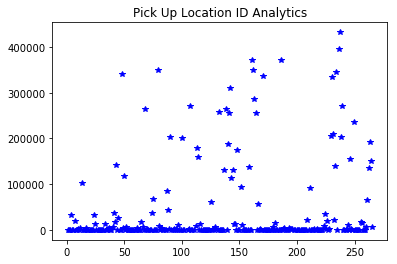

237    432244
236    396235
161    372269
186    371034
162    350427
79     350290
234    344762
48     340972
170    336389
230    335293
142    310957
163    286326
239    271255
107    269996
68     264669
138    264309
132    256951
164    256175
141    255754
249    235043
231    210574
229    205779
90     203778
238    202736
100    201204
263    192403
140    187658
113    178774
148    173997
114    158989
        ...  
81         21
117        20
183        18
139        18
201        11
86         11
172        11
105        10
206         9
2           9
23          8
245         8
118         7
184         7
59          7
214         6
251         6
156         6
84          5
176         5
187         5
27          4
30          4
44          4
46          3
204         3
109         3
5           2
58          2
99          1
Name: PULocationID, dtype: int64

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

FilePath = '../yellow_tripdata_2016-10.csv'

ds = pd.read_csv( FilePath )

df = pd.DataFrame( ds , columns=['PULocationID','DOLocationID', 'tpep_pickup_datetime' , 'tpep_dropoff_datetime' , 'trip_distance' , 'tip_amount' , 'payment_type'])

# Pickup section
plt.plot( df['PULocationID'].value_counts() , 'b*' )
plt.title("Pick Up Location ID Analytics")
plt.show()

df['PULocationID'].value_counts()

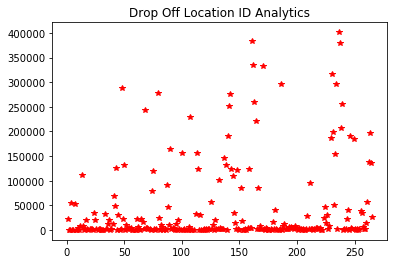

236    401427
161    383919
237    380132
162    334607
170    332940
230    316679
186    296656
234    295862
48     287688
79     277972
142    276897
163    260136
239    254972
141    251032
68     243825
107    229505
164    221806
238    207385
231    198722
263    196964
140    191663
246    190552
229    186129
249    184982
90     163492
113    156247
100    155704
233    154321
137    145731
262    137779
        ...  
23        238
6         225
96        193
206       193
8         177
118       171
214       166
251       152
111       138
46        136
172       132
245       126
154        92
84         90
109        82
176        81
156        81
27         77
184        76
59         67
253        65
204        65
5          58
187        51
44         46
30         33
105        11
2           6
99          2
104         1
Name: DOLocationID, dtype: int64

In [2]:
# Dropoff section
plt.plot( df['DOLocationID'].value_counts() , 'r*' )
plt.title("Drop Off Location ID Analytics")
plt.show()

df['DOLocationID'].value_counts()

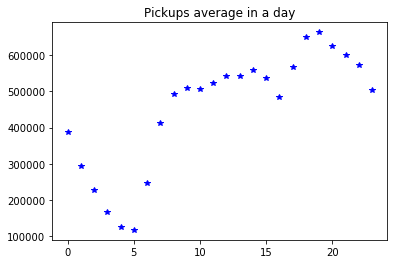

19    662858
18    651059
20    625389
21    598790
22    571744
17    567508
14    559250
13    542061
12    541814
15    536111
11    522197
9     508474
10    505199
23    503043
8     491766
16    483548
7     411946
0     389318
1     294779
6     247110
2     227556
3     168203
4     126810
5     118093
Name: tpep_pickup_datetime, dtype: int64

In [3]:
# peak hour
dp = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

plt.plot( dp.value_counts() , 'b*' )
plt.title("Pickups average in a day")
plt.show()
dp.value_counts()

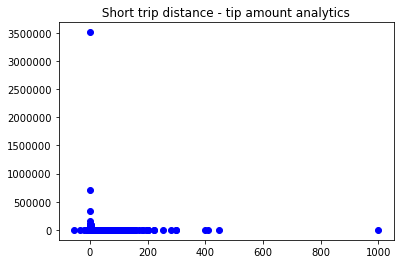

The average of tips in short dist travel is 1.3513399144117206
The payment type counting is


1    6114831
2    3233286
3      33122
4      11652
Name: payment_type, dtype: int64

In [4]:
# short distance travel
meanval = df['trip_distance'].mean()
ranges = [0, 5.5 ,40]
td = df.groupby(pd.cut(df['trip_distance'] , ranges))
plt.plot( td.get_group('(0, 5.5]').tip_amount.value_counts() , 'bo' )
plt.title(" Short trip distance - tip amount analytics ")
plt.show()
print('The average of tips in short dist travel is {}'.format(td.get_group('(0, 5.5]').tip_amount.mean()) )
print('The payment type counting is')
td.get_group('(0, 5.5]').payment_type.value_counts()

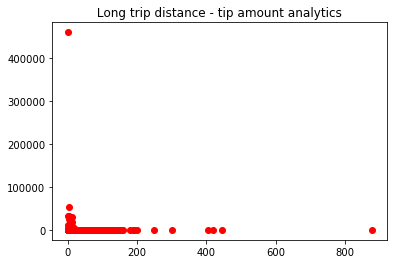

The average of tips in long dist travel is 4.920571037685965
The payment type counting is


1    989678
2    396069
3      7224
4      2400
5         1
Name: payment_type, dtype: int64

In [6]:
# long distance travel
plt.plot( td.get_group('(5.5, 40]').tip_amount.value_counts() , 'ro' )
plt.title(" Long trip distance - tip amount analytics ")
plt.show()
print('The average of tips in long dist travel is {}'.format(td.get_group('(5.5, 40]').tip_amount.mean()) )
print('The payment type counting is')
td.get_group('(5.5, 40]').payment_type.value_counts()